In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Load CSV

In [2]:
dfData = pd.read_csv('PreprocessedData/DelayData.csv')

Subsets

In [3]:
grpAge = dfData[ ['Year', 'ArrDelay', 'DepDelay', 'ManuYear'] ]
grpAge = grpAge[(grpAge['ManuYear'] != 'None') & (grpAge['ManuYear'] != '0')]
grpAge['Year'] = grpAge['Year'] - grpAge['ManuYear'].astype(int)
grpAge = grpAge.groupby('Year')
mnAge = grpAge.agg({'ArrDelay': 'mean', 'DepDelay': 'mean'})[1:]

Curve Fit

In [4]:
def cfMod(x, a, b, c): return a*x**2 + b*x + c

In [5]:
X = mnAge.index.values
Y = mnAge['ArrDelay']+mnAge['DepDelay']

In [6]:
param, param_cov = curve_fit(cfMod, X, Y)
yfit = cfMod(X, param[0], param[1], param[2])

Visualize

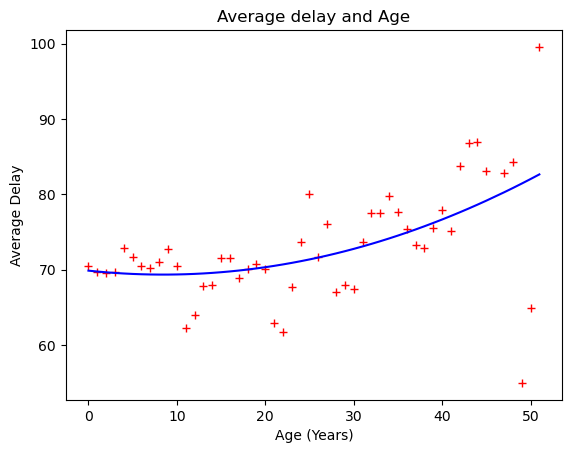

In [7]:
plt.figure(0)
plt.plot(X, Y, '+r')
plt.plot(X, yfit, '-b')
plt.title('Average delay and Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Delay')
plt.show()